In [1]:
%load_ext tensorboard

In [2]:
import tensorflow as tf
import datetime

In [3]:
!rm -rf ./logs/ 

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='layers_flatten'),
    tf.keras.layers.Dense(512, activation='relu', name='layers_dense'),
    tf.keras.layers.Dropout(0.2, name='layers_dropout'),
    tf.keras.layers.Dense(10, activation='softmax', name='layers_dense_2')
  ])

11490434/11490434 [==============================] - 3s 0us/step


In [5]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2190 - accuracy: 0.9349 - val_loss: 0.1047 - val_accuracy: 0.9680
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0960 - accuracy: 0.9711 - val_loss: 0.0797 - val_accuracy: 0.9752
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0671 - accuracy: 0.9786 - val_loss: 0.0722 - val_accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0546 - accuracy: 0.9818 - val_loss: 0.0676 - val_accuracy: 0.9786
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0422 - accuracy: 0.9862 - val_loss: 0.0642 - val_accuracy: 0.9803


In [6]:
%tensorboard --logdir logs/fit

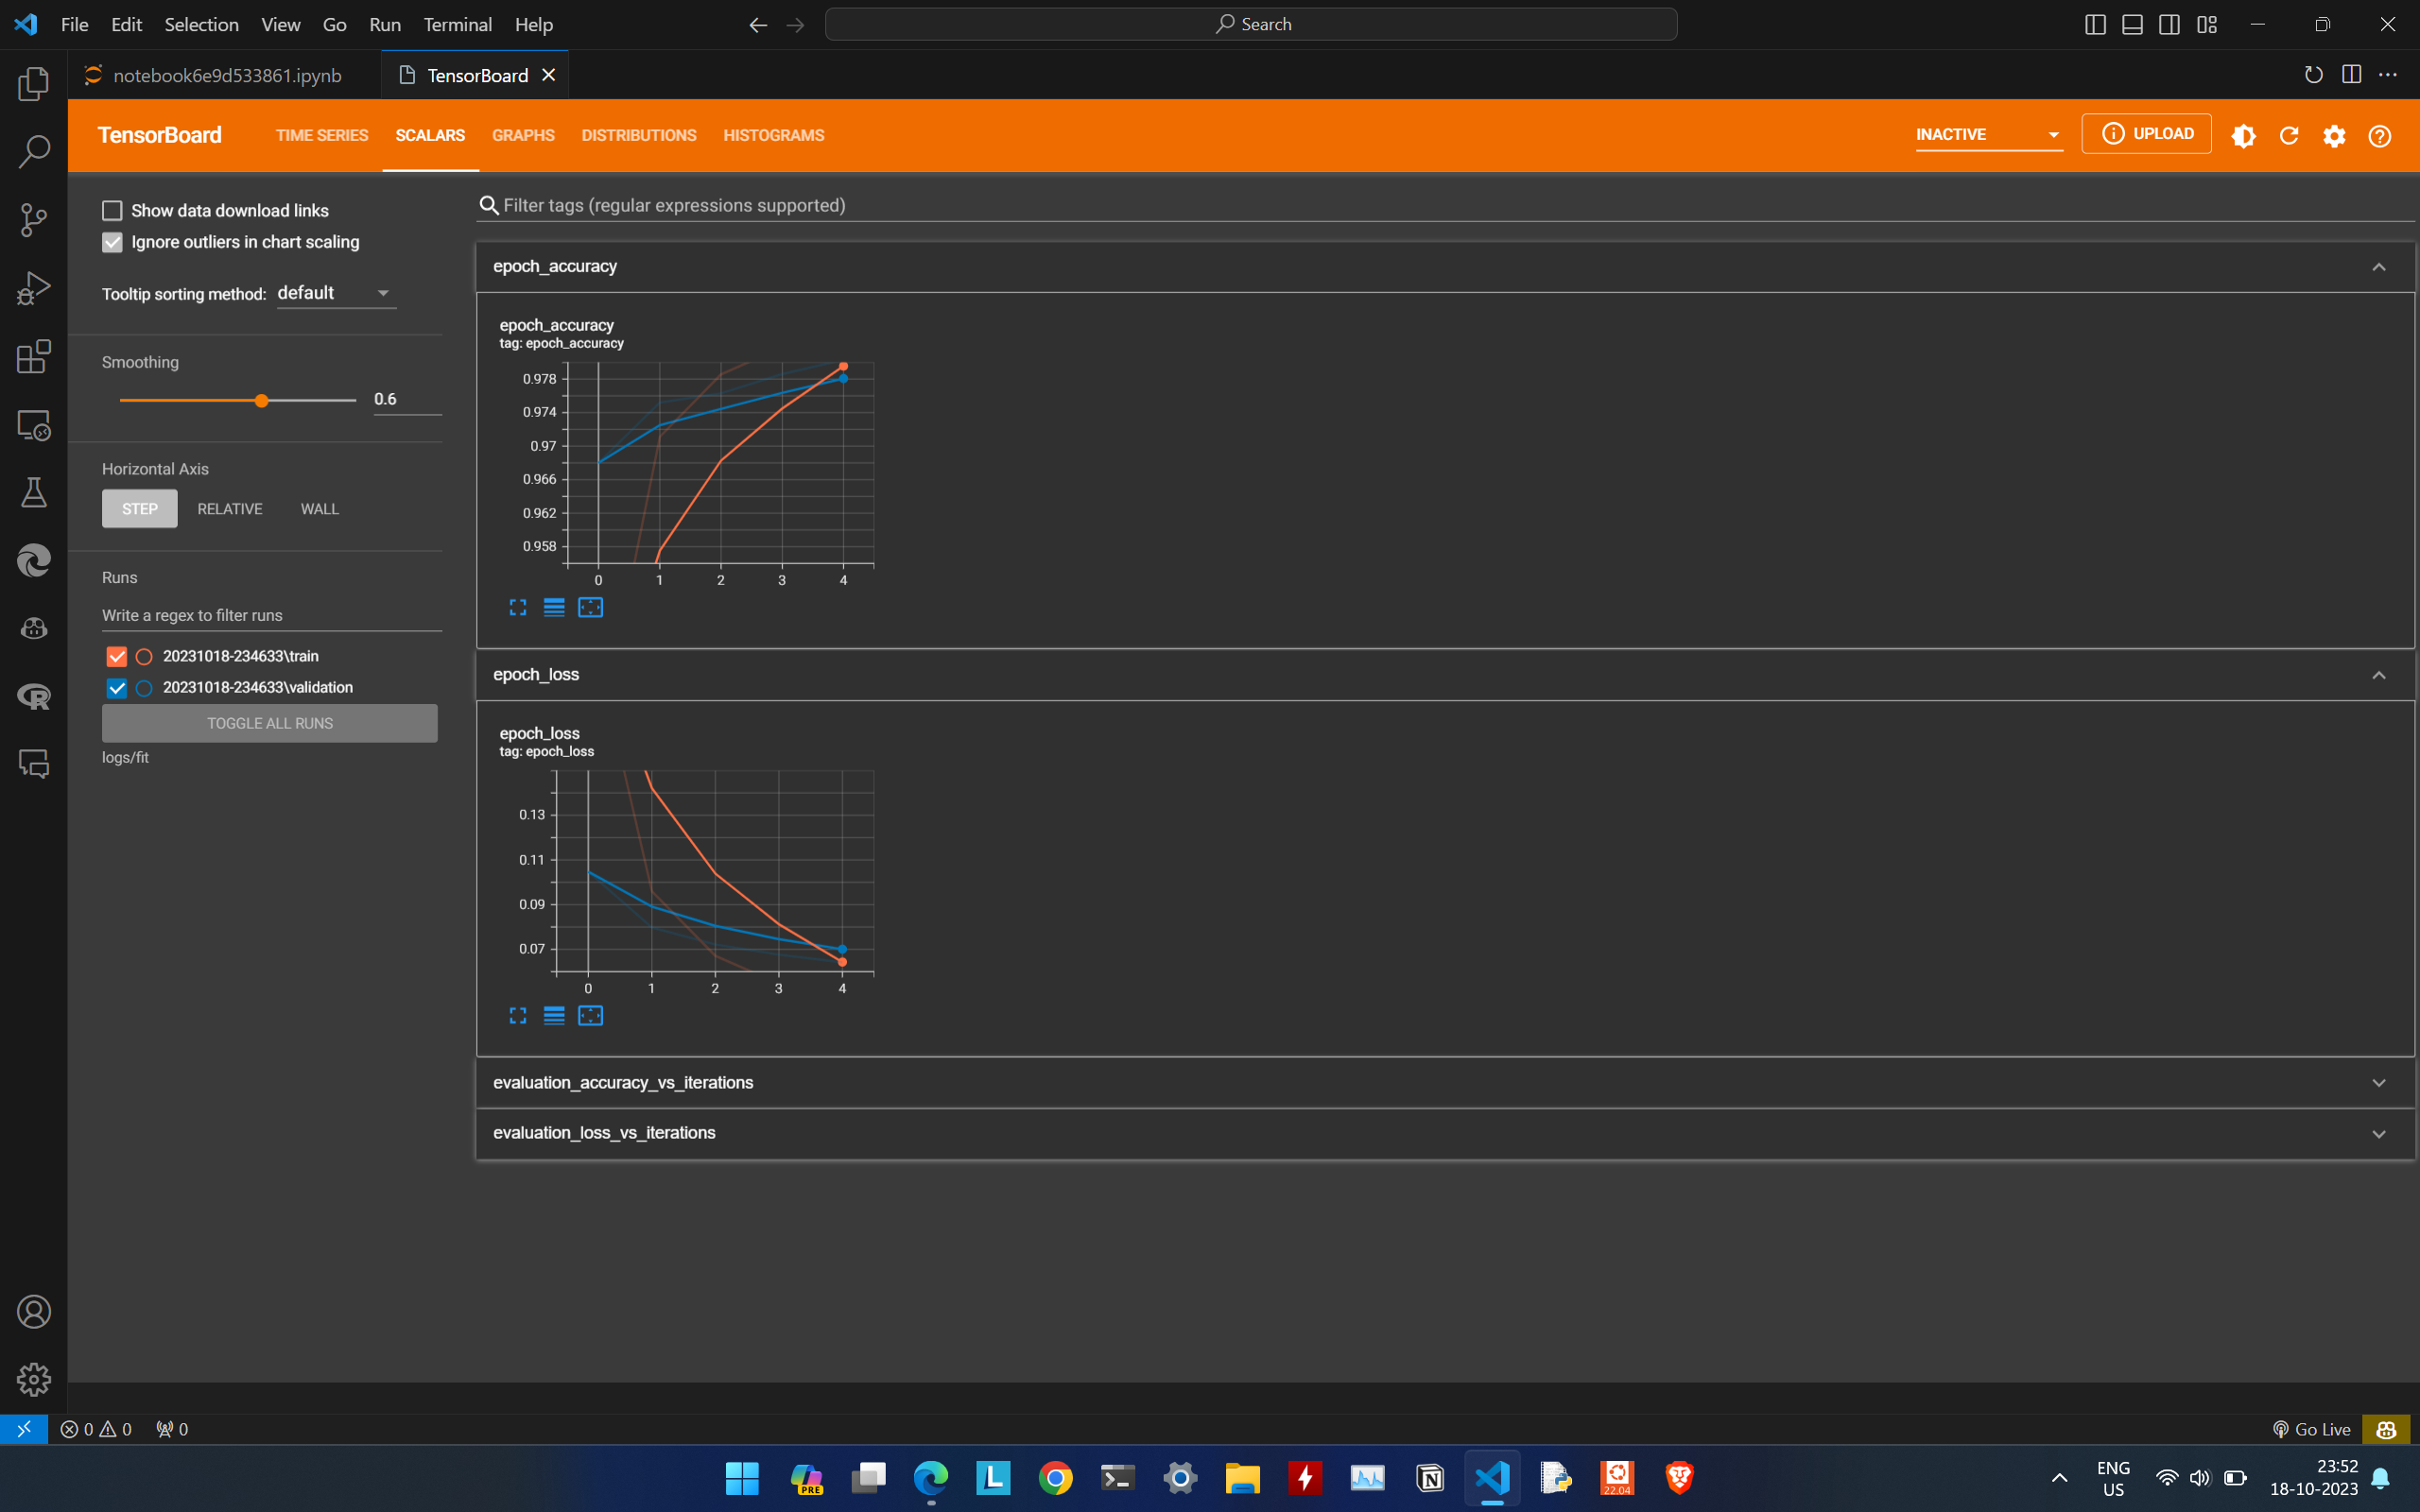